# ***2. Mall Customer Segmentation Dataset***

In [529]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [530]:
import pandas as pd
mall_customers = pd.read_csv('Mall_Customers.csv')

In [531]:
mall_customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [532]:
print(mall_customers.shape)

(200, 5)


In [533]:
mall_customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [534]:
mall_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [535]:
CID = mall_customers['CustomerID']
mall_customers= mall_customers.drop('CustomerID', axis=1)

Convert* 'Gender' column to numeric:

In [536]:
mall_customers['Gender'] = mall_customers['Gender'].map({'Female': 0, 'Male': 1})
mall_customers

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [537]:
print(mall_customers['Gender'])

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int64


#value_counts() was used to check the distribution of gender values after encoding, and to prepare the data for visualization.

In [538]:
gender_counts = mall_customers['Gender'].value_counts()
print(gender_counts)

Gender
0    112
1     88
Name: count, dtype: int64


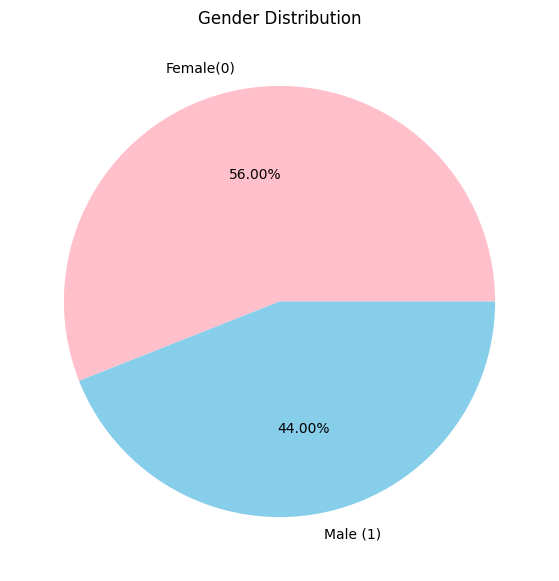

In [539]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,7))
plt.pie(gender_counts, labels=['Female(0)', 'Male (1)'], autopct='%1.2f%%', colors=['pink', 'skyblue'])
plt.title('Gender Distribution')
plt.show()

Feature eng

In [540]:
mall_customers['SpendingRatio'] = mall_customers['Spending Score (1-100)'] / mall_customers['Annual Income (k$)']

In [541]:
def add_income_level_feature(df):
    income = df['Annual Income (k$)']
    level = []

    for val in income:
        if val < 30:
            level.append(0)
        elif val < 70:
            level.append(1)
        else:
            level.append(2)

    df['IncomeLevel'] = level
    return df

mall_customers = add_income_level_feature(mall_customers)

In [542]:
mall_customers.drop('Annual Income (k$)', axis=1, inplace=True)
mall_customers

,Gender,Age,Spending Score (1-100),SpendingRatio,IncomeLevel
0,1,19,39,2.600000,0
1,1,21,81,5.400000,0
2,0,20,6,0.375000,0
3,0,23,77,4.812500,0
4,0,31,40,2.352941,0
...,...,...,...,...,...
195,0,35,79,0.658333,2
196,0,45,28,0.222222,2
197,1,32,74,0.587302,2
198,1,32,18,0.131387,2


Ploting before scaling


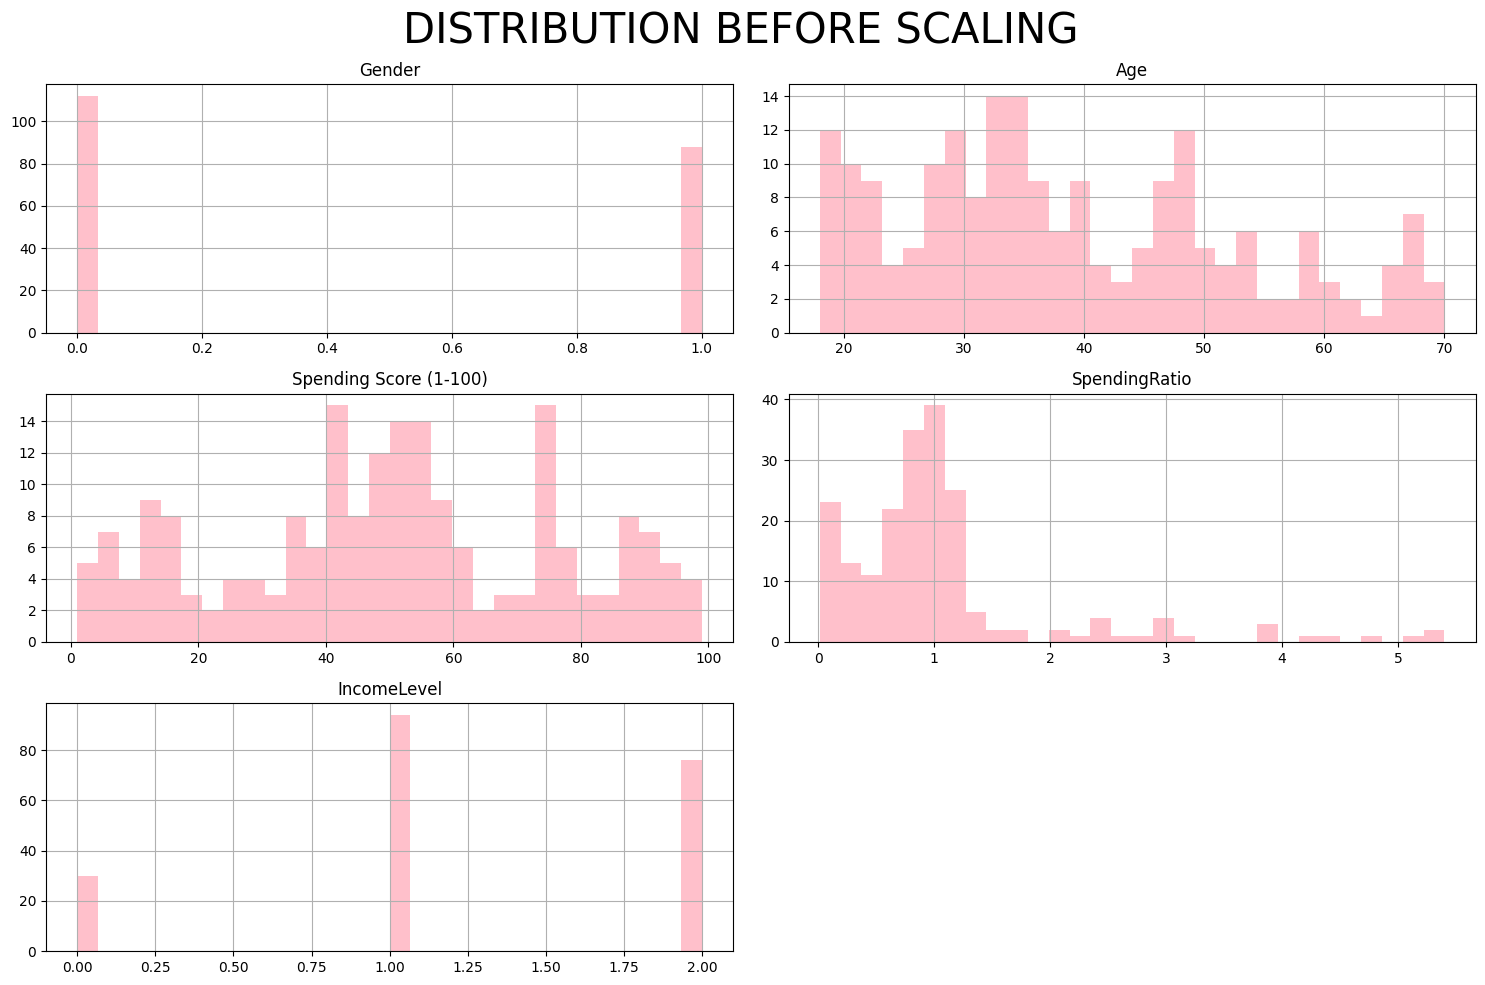

In [543]:
import matplotlib.pyplot as plt
mall_customers.hist(bins=30, figsize=(15, 10),color='pink')
plt.suptitle("DISTRIBUTION BEFORE SCALING", fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()


standardScaler was applied to scale the data,to making it ready

In [544]:
from sklearn.preprocessing import StandardScaler
features = ['Gender', 'Age','IncomeLevel',  'Spending Score (1-100)']
mall_customers=mall_customers[features]
scaler = StandardScaler()
mall_customers_scaled = scaler.fit_transform(mall_customers)
mall_customers

,Gender,Age,IncomeLevel,Spending Score (1-100)
0,1,19,0,39
1,1,21,0,81
2,0,20,0,6
3,0,23,0,77
4,0,31,0,40
...,...,...,...,...
195,0,35,2,79
196,0,45,2,28
197,1,32,2,74
198,1,32,2,18


Feature Distributions AFTER Scaling

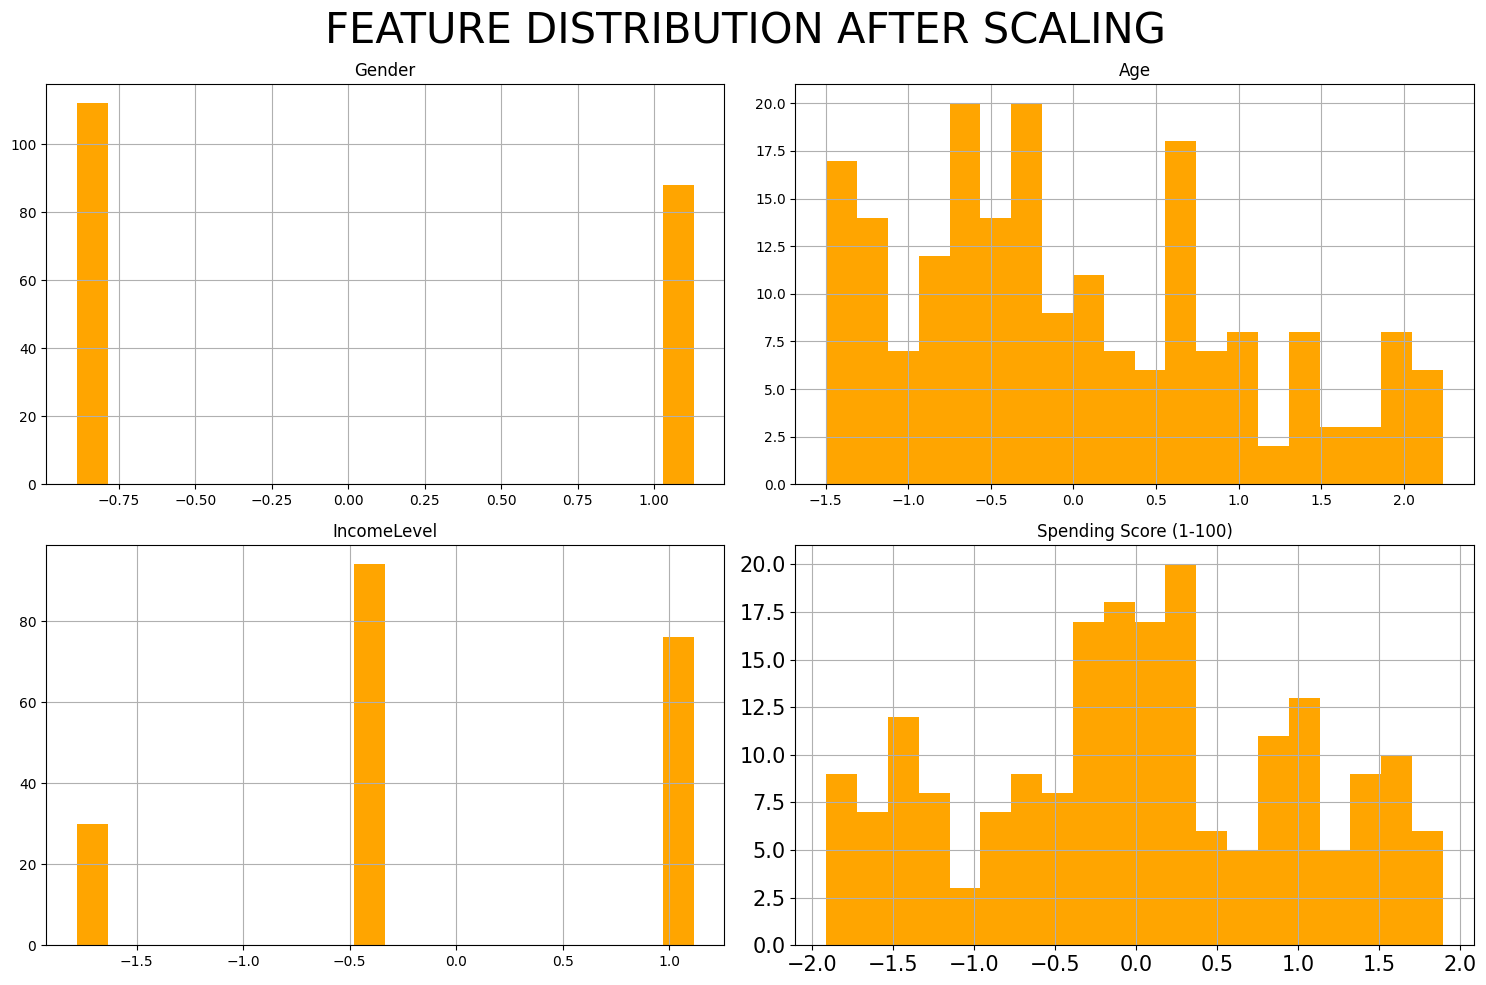

In [545]:
mall_customers_scaled_df = pd.DataFrame(mall_customers_scaled, columns=mall_customers.columns)
mall_customers_scaled_df.hist(bins=20, figsize=(15, 10), color='orange')
plt.suptitle("FEATURE DISTRIBUTION AFTER SCALING",fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()

In [546]:
print(mall_customers_scaled.shape)

(200, 4)


#2. Dimensionality Reduction

o Analyze explained variance.

In [547]:
import numpy as np
Card_meaned = mall_customers - np.mean(mall_customers, axis=0)
X_std = Card_meaned / np.std(Card_meaned, axis=0)

cov_matrix = np.cov(X_std, rowvar=False)

eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_index]

explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)

cumulative_explained_variance = np.cumsum(explained_variance_ratio)

for i, (var, cum_var) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance), start=1):
    print(f"PC{i}: Explained Variance Ratio = {var:.4f}, Cumulative = {cum_var:.4f}")

PC1: Explained Variance Ratio = 0.3369, Cumulative = 0.3369
PC2: Explained Variance Ratio = 0.2622, Cumulative = 0.5991
PC3: Explained Variance Ratio = 0.2330, Cumulative = 0.8321
PC4: Explained Variance Ratio = 0.1679, Cumulative = 1.0000


Choose the minimum number of components preserving 90–95% variance:

In [548]:
mall_customers_pca_90 = np.argmax(cumulative_explained_variance >= 0.90) + 1
mall_customers_pca_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1

print(f"Number of components to preserve 90% variance: {mall_customers_pca_90}")
print(f"Number of components to preserve 95% variance: {mall_customers_pca_95}")

Number of components to preserve 90% variance: 4
Number of components to preserve 95% variance: 4


Aply PCA:

In [549]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
mall_customers_pca = pca.fit_transform(mall_customers_scaled)
print('original shape:',mall_customers_scaled.shape)
print('reduced  shape:',mall_customers_pca.shape)

print(mall_customers_pca)


original shape: (200, 4)
reduced  shape: (200, 3)
[[-3.90601302e-01 -5.19331840e-01  2.03780440e+00]
 [-1.41160373e+00 -4.21193862e-01  2.30339525e+00]
 [ 6.97778634e-02 -1.87752731e+00  3.10231843e-01]
 [-1.67502300e+00 -1.70828300e+00  7.61831781e-01]
 [-2.93291527e-01 -1.88043788e+00  4.60595204e-01]
 [-1.69776483e+00 -1.70225865e+00  7.62070500e-01]
 [ 8.10837571e-01 -2.00921265e+00  2.06875453e-01]
 [-2.12827959e+00 -1.66145366e+00  8.74910804e-01]
 [ 2.79241530e+00 -1.01355590e+00  1.48827376e+00]
 [-1.19588438e+00 -1.78350950e+00  6.80340263e-01]
 [ 2.64734357e+00 -1.00959163e+00  1.54077127e+00]
 [-1.66874259e+00 -1.75302860e+00  8.25484229e-01]
 [ 1.70716975e+00 -2.18633818e+00  1.08261020e-01]
 [-1.62561902e+00 -1.71706203e+00  7.54941355e-01]
 [ 1.19188630e+00 -7.48975604e-01  1.74083234e+00]
 [-1.30887545e+00 -4.35482220e-01  2.28320141e+00]
 [ 3.76351559e-02 -1.92932731e+00  3.99774964e-01]
 [-1.06107543e+00 -4.53734847e-01  2.21051007e+00]
 [ 1.50635158e+00 -8.36586275e-0

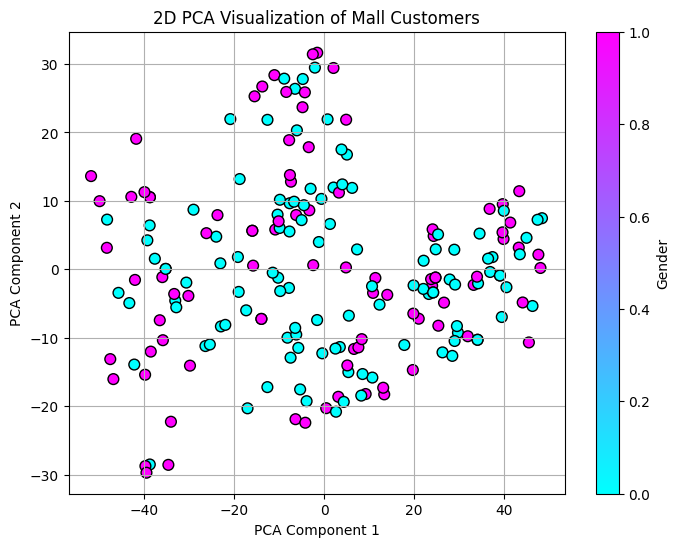

In [550]:
pca_2d = PCA(n_components=3)
mall_pca_2d = pca_2d.fit_transform(mall_customers)

plt.figure(figsize=(8, 6))
plt.scatter(mall_pca_2d[:, 0], mall_pca_2d[:, 1], c=mall_customers['Gender'], cmap='cool', s=60, edgecolor='k')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("2D PCA Visualization of Mall Customers")
plt.grid(True)
plt.colorbar(label="Gender")
plt.show()

In [551]:
pca = PCA(n_components=3)
mall_customers_pca_90 = pca.fit_transform(mall_customers)


print("Shape of data after PCA:", mall_customers_pca_90.shape)
print("First 5 rows of PCA-transformed data:\n", mall_customers_pca_90[:5])

Shape of data after PCA: (200, 3)
First 5 rows of PCA-transformed data:
 [[ -6.33645616 -21.89067897  -1.21086656]
 [ 34.0782982  -10.28695382  -1.19368414]
 [-38.68098023 -28.50680588  -1.30302801]
 [ 29.72679393  -9.26172896  -1.27450356]
 [ -8.12128097  -9.98373893  -1.27626344]]


# • Apply t-SNE for visualization:

In [552]:
from sklearn.manifold import TSNE
tsne = TSNE()
mall_customers_tsne = tsne.fit_transform  (mall_customers)

visualization before and after clustering

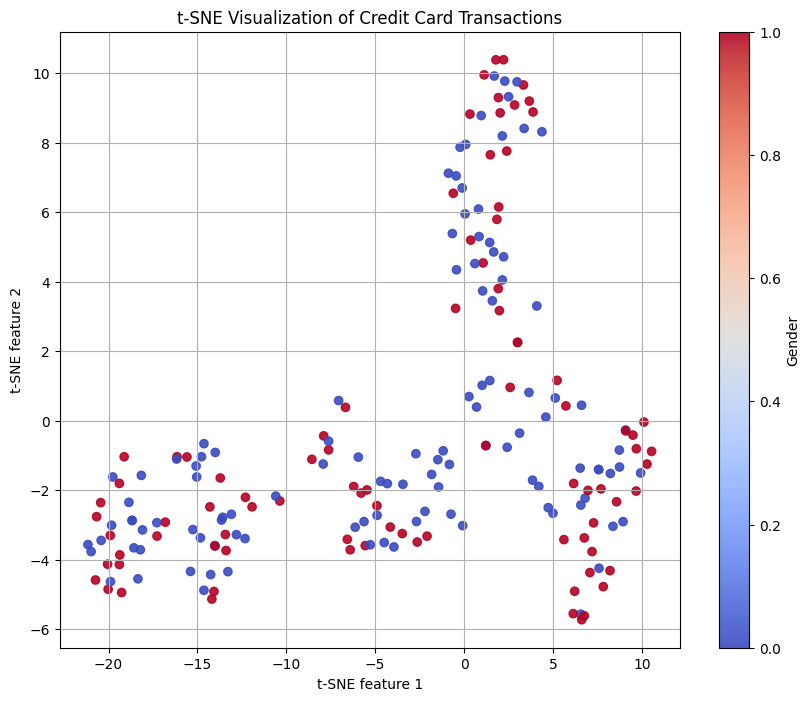

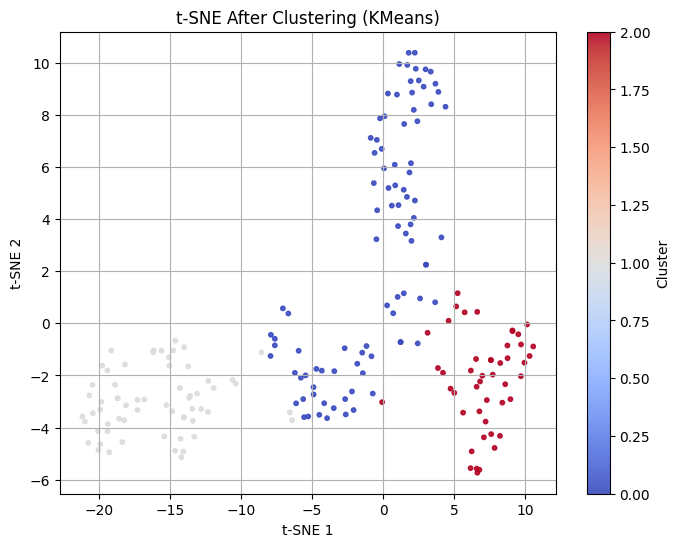

In [553]:
tsne = TSNE()
mall_customers_tsne = tsne.fit_transform(mall_customers)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(mall_customers_tsne[:, 0], mall_customers_tsne[:, 1],
                      c=mall_customers['Gender'], cmap='coolwarm', alpha=0.9)
plt.colorbar(scatter, label='Gender')
plt.xlabel("t-SNE feature 1")
plt.ylabel("t-SNE feature 2")
plt.title("t-SNE Visualization of Credit Card Transactions")
plt.grid(True)
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(mall_customers)
plt.figure(figsize=(8, 6))
plt.scatter(mall_customers_tsne[:, 0], mall_customers_tsne[:, 1], c=clusters, cmap='coolwarm', s=10, alpha=0.9)
plt.title("t-SNE After Clustering (KMeans)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.grid(True)
plt.colorbar(label="Cluster")
plt.show()

# 2. Clustering Analysis




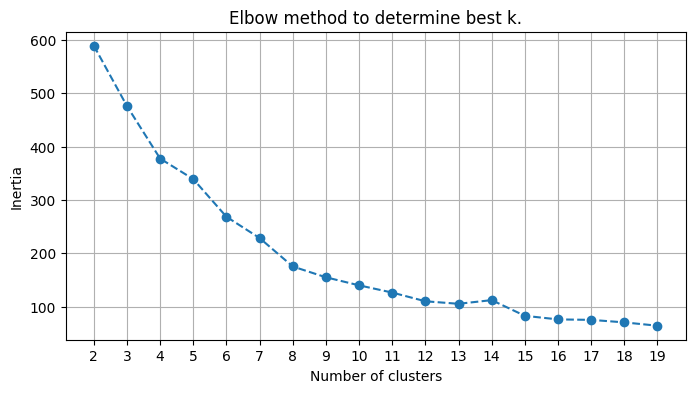

In [554]:
from sklearn.cluster import KMeans
inertia = []
k_values = range(2 , 20)
for k in k_values :
  kmeans = KMeans(n_clusters=k)
  kmeans.fit_predict(mall_customers_scaled)
  inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia, marker='o',linestyle='--')
plt.xticks(k_values)
plt.title("Elbow method to determine best k.")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

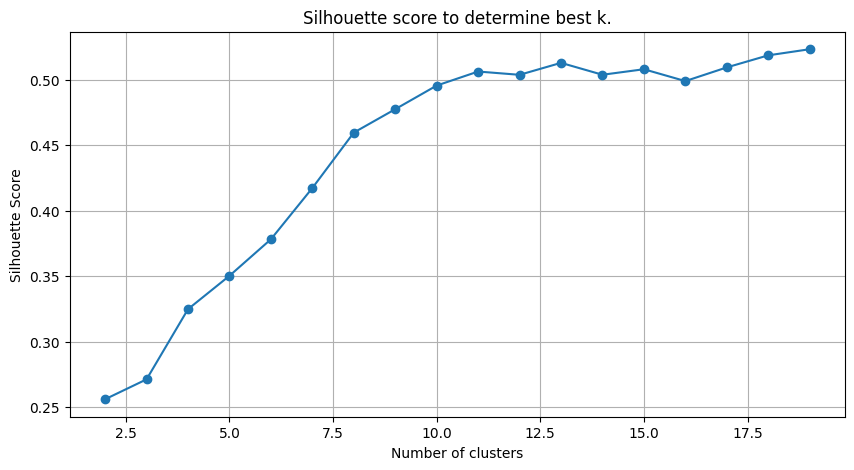

In [555]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
k_values = range(2 , 20)
silhouette_scores = []
for k in k_values :
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(mall_customers_scaled)
    score = silhouette_score(mall_customers_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette score to determine best k.')
plt.grid(True)
plt.show()

In [556]:
for k in range(2,20):
  kmean=KMeans(n_clusters=k,random_state=42)
  kmean.fit(mall_customers_pca)
  inertia.append(kmean.inertia_)
  print(f"Inertia for {k} clusters: {kmean.inertia_}")

Inertia for 2 clusters: 454.3917670860769
Inertia for 3 clusters: 363.9676034174024
Inertia for 4 clusters: 274.0851677343372
Inertia for 5 clusters: 198.3150231071554
Inertia for 6 clusters: 166.18455046008216
Inertia for 7 clusters: 138.74925236868597
Inertia for 8 clusters: 120.31137242184865
Inertia for 9 clusters: 103.82821387447684
Inertia for 10 clusters: 68.91582535310546
Inertia for 11 clusters: 60.85021649638627
Inertia for 12 clusters: 47.741511794777935
Inertia for 13 clusters: 42.40657230291519
Inertia for 14 clusters: 38.45770309004556
Inertia for 15 clusters: 35.058021939919556
Inertia for 16 clusters: 31.743652001210794
Inertia for 17 clusters: 27.503049895717783
Inertia for 18 clusters: 26.291460410455247
Inertia for 19 clusters: 25.173859633728647


In [557]:
for k in range(2,20):
  kmean=KMeans(n_clusters=k,random_state=42)
  kmean.fit(mall_customers_pca)
  inertia.append(kmean.inertia_)
  print(f"Inertia for {k} clusters: {kmean.inertia_}")


  labels = kmean.fit_predict(mall_customers_pca)
print("Silhouette Score:", silhouette_scores)

Inertia for 2 clusters: 454.3917670860769
Inertia for 3 clusters: 363.9676034174024
Inertia for 4 clusters: 274.0851677343372
Inertia for 5 clusters: 198.3150231071554
Inertia for 6 clusters: 166.18455046008216
Inertia for 7 clusters: 138.74925236868597
Inertia for 8 clusters: 120.31137242184865
Inertia for 9 clusters: 103.82821387447684
Inertia for 10 clusters: 68.91582535310546
Inertia for 11 clusters: 60.85021649638627
Inertia for 12 clusters: 47.741511794777935
Inertia for 13 clusters: 42.40657230291519
Inertia for 14 clusters: 38.45770309004556
Inertia for 15 clusters: 35.058021939919556
Inertia for 16 clusters: 31.743652001210794
Inertia for 17 clusters: 27.503049895717783
Inertia for 18 clusters: 26.291460410455247
Inertia for 19 clusters: 25.173859633728647
Silhouette Score: [np.float64(0.2562228262329171), np.float64(0.27139172481094115), np.float64(0.32490813813908687), np.float64(0.35034464573579727), np.float64(0.37820196911821513), np.float64(0.4172831943167462), np.float6

In [558]:
silhouette_scores = []
k_values = range(2, 20)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(mall_customers_pca)
    score = silhouette_score(mall_customers_pca, labels)
    silhouette_scores.append(score)
    print(f"Silhouette Score for k={k}: {score:.4f}")

Silhouette Score for k=2: 0.3053
Silhouette Score for k=3: 0.3210
Silhouette Score for k=4: 0.3769
Silhouette Score for k=5: 0.4272
Silhouette Score for k=6: 0.4452
Silhouette Score for k=7: 0.4665
Silhouette Score for k=8: 0.5009
Silhouette Score for k=9: 0.5157
Silhouette Score for k=10: 0.5829
Silhouette Score for k=11: 0.5886
Silhouette Score for k=12: 0.6180
Silhouette Score for k=13: 0.6097
Silhouette Score for k=14: 0.5959
Silhouette Score for k=15: 0.6067
Silhouette Score for k=16: 0.6143
Silhouette Score for k=17: 0.6195
Silhouette Score for k=18: 0.5930
Silhouette Score for k=19: 0.5711


o Create Silhouette diagrams for at least 3 values of k

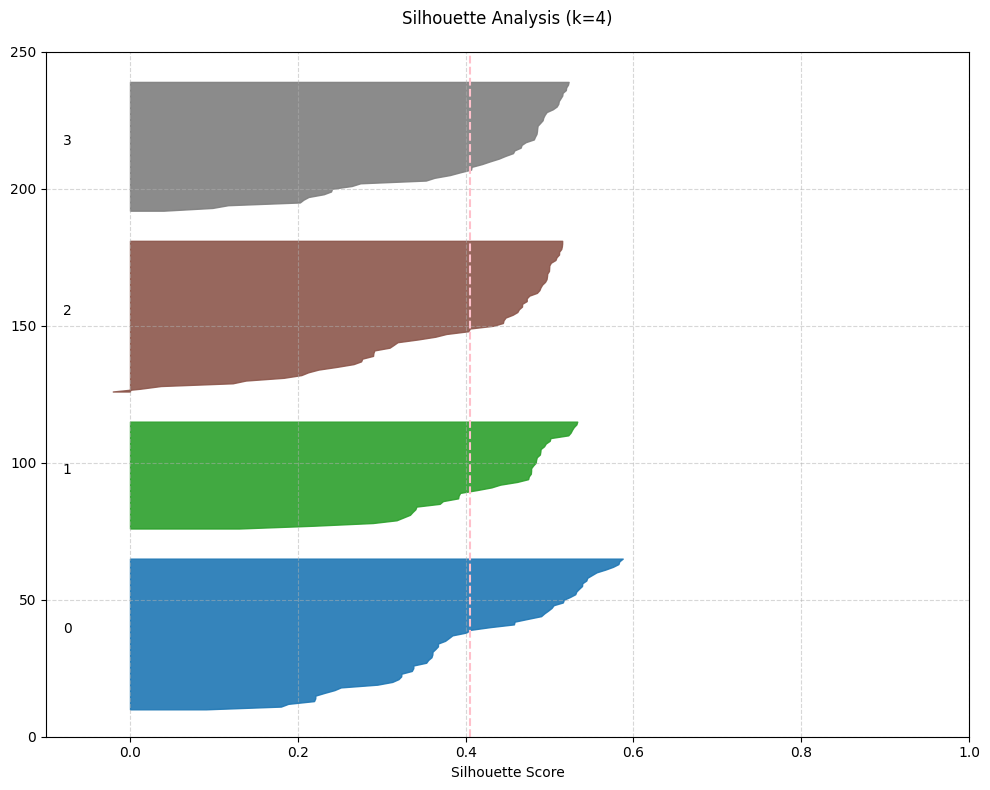

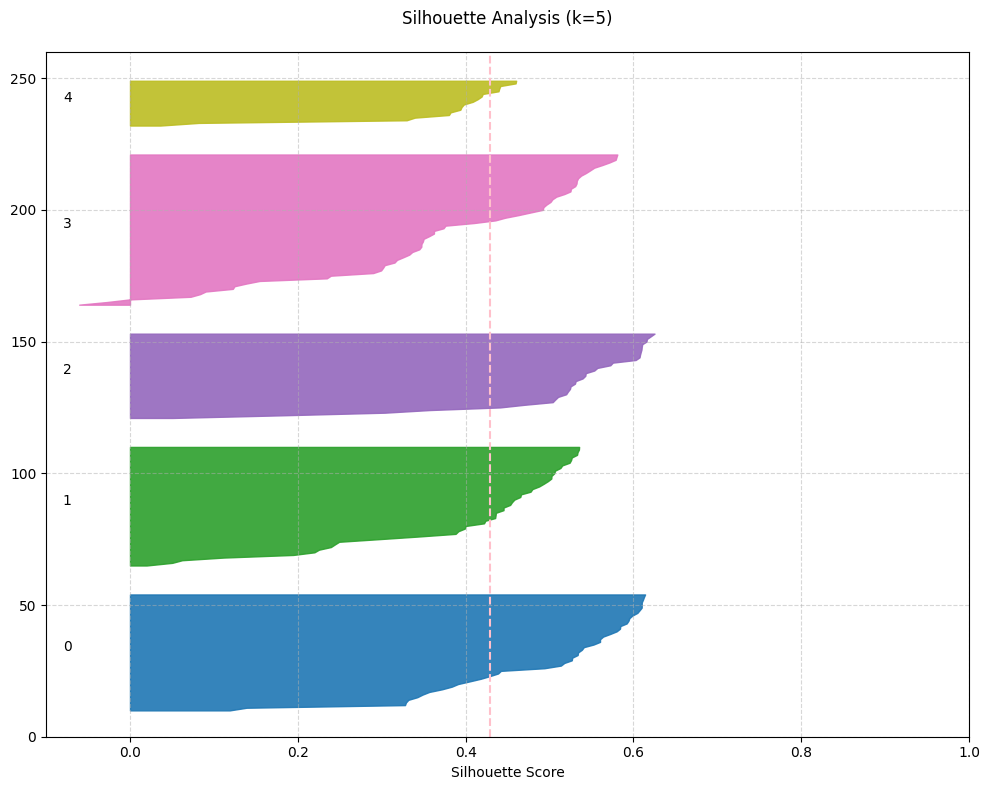

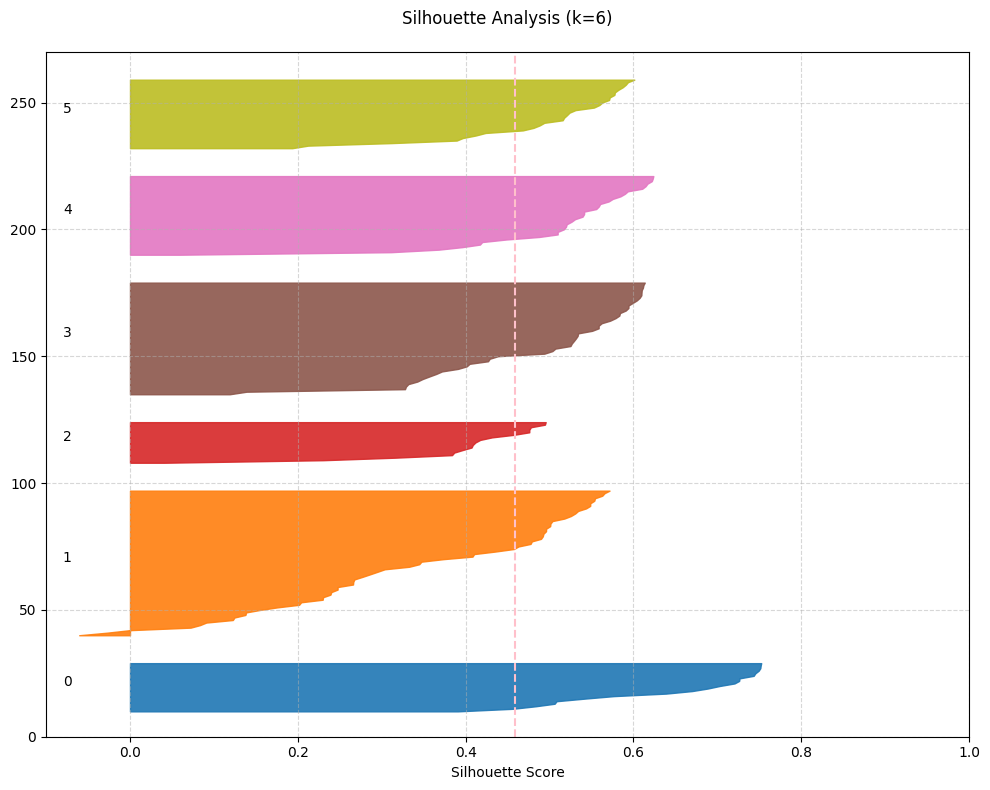

In [559]:
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

cluster_numbers = [4, 5, 6]
for k in cluster_numbers:


    fig, ax = plt.subplots(figsize=(10, 8))

    data_to_cluster = mall_customers_pca


    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_to_cluster)

    scores = silhouette_samples(data_to_cluster, labels)
    avg_score = np.mean(scores)


    ax.set_title(f"Silhouette Analysis (k={k})", pad=20)
    ax.set_xlabel("Silhouette Score")
    ax.axvline(avg_score, color='pink', linestyle='--')
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(mall_customers) + (k + 1) * 10])
    ax.grid(True, linestyle='--', alpha=0.5)

    y_position = 10

    for cluster in range(k):
        cluster_scores = sorted(scores[labels == cluster])
        y_end = y_position + len(cluster_scores)

        ax.fill_betweenx(
            np.arange(y_position, y_end),
            0, cluster_scores,
            color=plt.cm.tab10(cluster / k),
            alpha=0.9
        )
        ax.text(-0.08, y_position + len(cluster_scores) / 2, str(cluster))
        y_position = y_end + 10

    plt.tight_layout()
    plt.show()


• K-Means++ Initialization:

Compare standard K-Means and K-Means++.


Silhouette Score (Standard K-Means): 0.4213235955138166
Silhouette Score (K-Means++): 0.45230214175647715


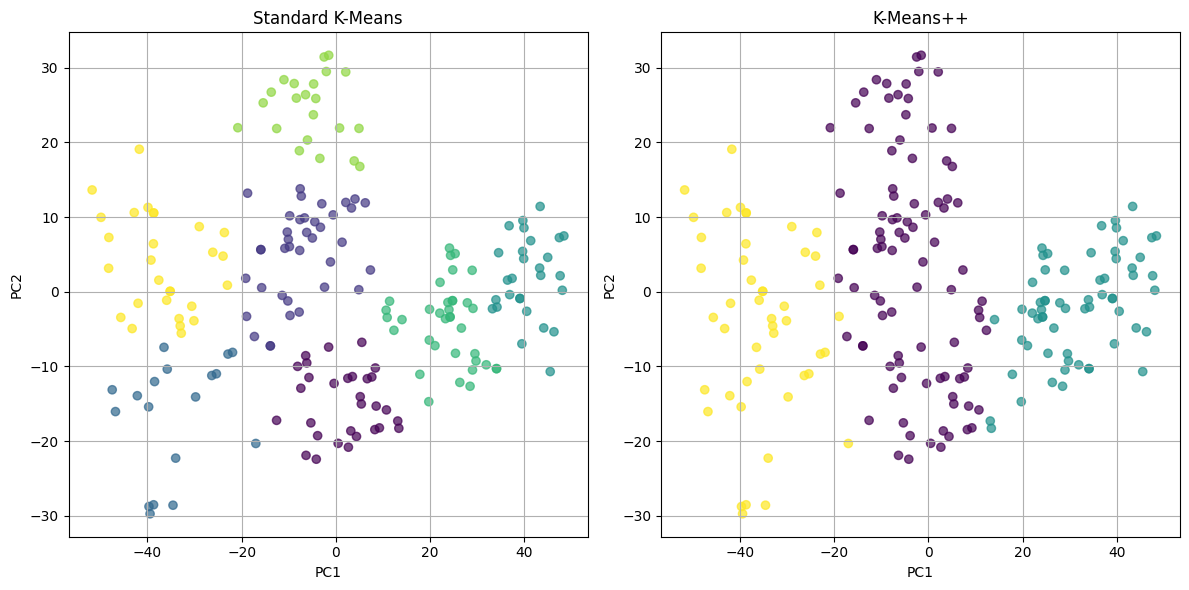

In [570]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans_standard = KMeans(n_clusters=7, init='random', random_state=42)

clusters_standard = kmeans_standard.fit_predict(mall_customers_pca_90)

kmeans_plusplus = KMeans(n_clusters=k, init='k-means++', random_state=42)

clusters_plusplus = kmeans_plusplus.fit_predict(mall_customers_pca_90)

silhouette_avg_standard = silhouette_score(mall_customers_pca_90, clusters_standard)
silhouette_avg_plusplus = silhouette_score(mall_customers_pca_90, clusters_plusplus)

print(f"Silhouette Score (Standard K-Means): {silhouette_avg_standard}")
print(f"Silhouette Score (K-Means++): {silhouette_avg_plusplus}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(mall_customers_pca_90[:, 0], mall_customers_pca_90[:, 1], c=clusters_standard, cmap='viridis', alpha=0.7)
plt.title('Standard K-Means')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)

plt.subplot(1, 2, 2)

plt.scatter(mall_customers_pca_90[:, 0], mall_customers_pca_90[:, 1], c=clusters_plusplus, cmap='viridis', alpha=0.7)
plt.title('K-Means++')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.tight_layout()
plt.grid(True)
plt.show()

how initialization impacts convergence and results

In [561]:
n_runs = 10
k = 3

inertias_random = []
silhouettes_random = []

inertias_plus = []
silhouettes_plus = []

kmeans_random = KMeans(n_clusters=k, init='random', random_state=42, n_init=10)
labels_random = kmeans_random.fit_predict(mall_customers_pca)
inertias_random.append(kmeans_random.inertia_)
silhouettes_random.append(silhouette_score(mall_customers_pca, labels_random))
print(inertias_random)
print(silhouettes_random)
kmeans_plus = KMeans(n_clusters=k, init='k-means++', random_state=None, n_init=10)
labels_plus = kmeans_plus.fit_predict(mall_customers_pca)
inertias_plus.append(kmeans_plus.inertia_)
silhouettes_plus.append(silhouette_score(mall_customers_pca, labels_plus))
print(inertias_plus)
print(silhouettes_plus)

[342.1766168730988]
[np.float64(0.33393494970625864)]
[342.1766168730988]
[np.float64(0.33393494970625864)]


Mini-Batch K-Means

In [562]:
import time
!pip install memory_profiler
from memory_profiler import memory_usage
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
k=3
start = time.time()
kmeans = KMeans(n_clusters=k, random_state=42)
labels_kmeans = kmeans.fit_predict(mall_customers_pca)
time_kmeans = time.time() - start
score_kmeans = silhouette_score(mall_customers_pca, labels_kmeans)

start = time.time()
mbkmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=16)
labels_mbk = mbkmeans.fit_predict(mall_customers_pca)
time_mbk = time.time() - start
score_mbk = silhouette_score(mall_customers_pca, labels_mbk)

print('Standard KMeans')
print(f"Inertia: {kmeans.inertia_:.2f}, Silhouette: {score_kmeans:.3f}, Time: {time_kmeans:.4f}s")

print('MiniBatch KMeans')
print(f"Inertia: {mbkmeans.inertia_:.2f}, Silhouette: {score_mbk:.3f}, Time: {time_mbk:.4f}s")

start_time = time.time()
mem_usage_minibatch = memory_usage((MiniBatchKMeans(n_clusters=k, batch_size=100, random_state=42).fit, (mall_customers_pca,)))
time_minibatch = time.time() - start_time

minibatch = MiniBatchKMeans(n_clusters=k, batch_size=100, random_state=42).fit(mall_customers_pca)
silhouette_minibatch = silhouette_score(mall_customers_pca, minibatch.labels_)

print(f"MiniBatchKMeans Time: {time_minibatch:.4f} seconds")
print(f"MiniBatchKMeans Memory Usage: {max(mem_usage_minibatch) - min(mem_usage_minibatch):.4f} MiB")
print(f"MiniBatchKMeans Inertia: {minibatch.inertia_:.4f}")
print(f"MiniBatchKMeans Silhouette Score: {silhouette_minibatch:.4f}")


Standard KMeans
Inertia: 363.97, Silhouette: 0.321, Time: 0.0034s
MiniBatch KMeans
Inertia: 393.37, Silhouette: 0.326, Time: 0.0037s
MiniBatchKMeans Time: 0.1289 seconds
MiniBatchKMeans Memory Usage: 0.0000 MiB
MiniBatchKMeans Inertia: 342.6456
MiniBatchKMeans Silhouette Score: 0.3346


# **DBSCAN Clustering**

In [563]:
eps_values = [0.3, 0.5, 0.7, 0.9, 1.1]
min_samples_values = [3, 5, 7, 10]

results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(mall_customers_pca)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        if n_clusters > 1:
            score = silhouette_score(mall_customers_pca, labels)
        else:
            score = -1

        results.append({
            'eps': eps,
            'min_samples': min_samples,
            'clusters': n_clusters,
            'noise': n_noise,
            'silhouette': round(score, 3)
        })

df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by='silhouette', ascending=False)

In [564]:
df_results

,eps,min_samples,clusters,noise,silhouette
0,0.3,3,16,17,0.539
5,0.5,5,10,15,0.494
4,0.5,3,10,7,0.477
1,0.3,5,10,40,0.458
6,0.5,7,8,28,0.458
8,0.7,3,8,5,0.424
10,0.7,7,7,15,0.423
9,0.7,5,8,9,0.407
11,0.7,10,6,31,0.400
12,0.9,3,7,2,0.367


In [565]:
from sklearn.cluster import DBSCAN

In [566]:
tsne = TSNE(n_components=3, random_state=42)
data_2d_tsne = tsne.fit_transform(mall_customers)

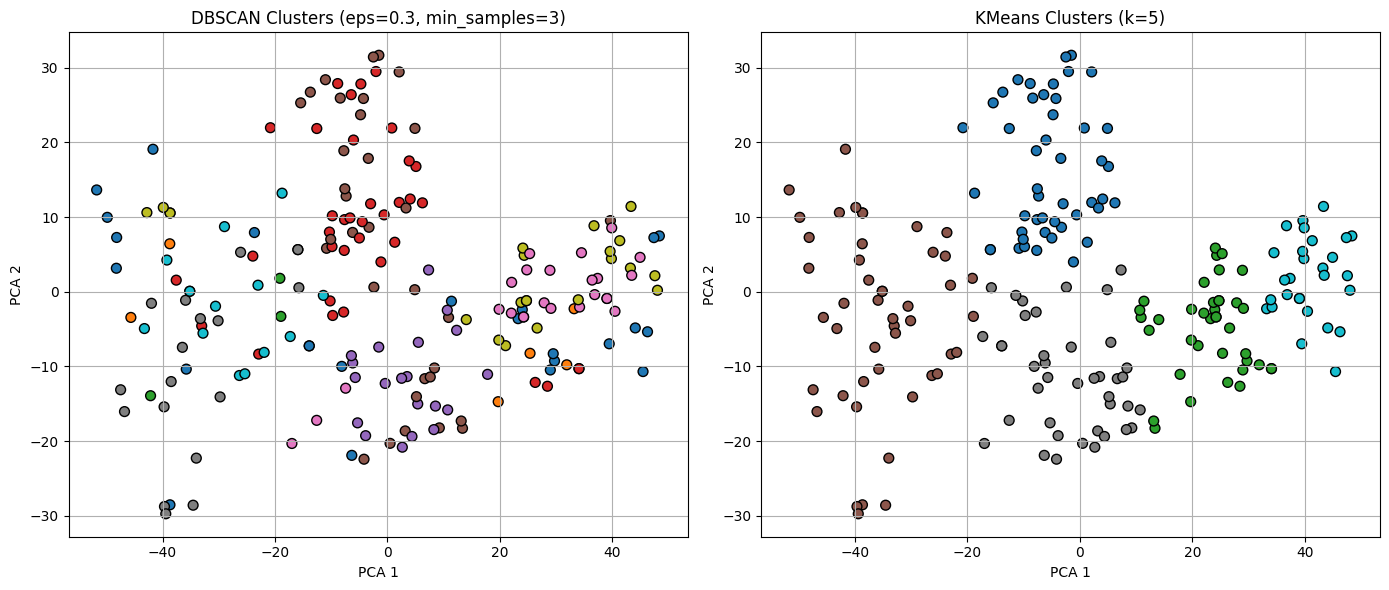

In [572]:
best_eps = 0.3
best_min_samples = 3

dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
db_labels = dbscan.fit_predict(mall_customers_pca)

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(mall_customers_pca_90)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].scatter(mall_customers_pca_90[:, 0], mall_customers_pca_90[:, 1], c=db_labels, cmap='tab10', s=50, edgecolor='k')
axs[0].set_title(f"DBSCAN Clusters (eps={best_eps}, min_samples={best_min_samples})")
axs[0].set_xlabel("PCA 1")
axs[0].set_ylabel("PCA 2")
axs[0].grid(True)

axs[1].scatter(mall_customers_pca_90[:, 0], mall_customers_pca_90[:, 1], c=kmeans_labels, cmap='tab10', s=50, edgecolor='k')
axs[1].set_title("KMeans Clusters (k=5)")
axs[1].set_xlabel("PCA 1")
axs[1].set_ylabel("PCA 2")
axs[1].grid(True)

plt.tight_layout()
plt.show()